# Titanic Data Analysis
**Author:** Derek Fintel

**Date:** March, 20th, 2025 

**Objective:** Predict the median house price in California using available housing features.


## Introduction
In this project we utilize a trusted Titanic dataset to conduct various analyses, exercise functions, and provide meaningful predicitions of target data. 

This project is organized into the following Sections:
- Section 0: Imports
- Section 1: Load and Inspect the Data
- Section 2: Data Exploration and Preparation
- Section 3: Feature Selection and Justification
- Section 4: Splitting

## Imports  
Below are our modules used.

In [81]:

# Import pandas for data manipulation and analysis. 
import pandas as pd

# Import pandas for data manipulation and analysis.
import numpy as np

# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns

# Import the California housing dataset from sklearn
from sklearn.datasets import fetch_california_housing

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split

# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression

# Import performance metrics for model evaluation
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Import Pandas Plotting and Scatter Matrix
from pandas.plotting import scatter_matrix

# Import Stratified Shuffle Split
from sklearn.model_selection import StratifiedShuffleSplit



## Section 1. Load and Inspect the Data

### 1.1 Load the dataset and display its info
- We load the Titanic dataset directly from `seaborn`.
- We display summary information of the dataset using the info() method.

In [82]:
# We Load the 'titantic' dataset via sns.load_dataset
titanic = sns.load_dataset('titanic')

## Section 2. Data Exploration and Preparation

### 2.1 Handle Missing Values and Clean Data

In [83]:
#Impute missing values for age using the median:
titanic.loc[:, 'age'] = titanic['age'].fillna(titanic['age'].median())

#Fill in missing values for embark_town using the mode:
titanic.loc[:, 'embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])


### 2.2 Feature Engineering
Create new features:

Add family_size - number of family members on board
Convert categorical "sex" to numeric
Convert categorical "embarked" to numeric
Binary feature - convert "alone" to numeric

In [84]:
# Create new features
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

## Section 3. Feature Selection and Justification
### 3.1 Choose features and target
Select two or more input features (numerical for regression, numerical and/or categorical for classification)
Use survived as the target. 
We will do three input cases like the example. 

-First:
input features: alone
target: survived

-Second:
input features - age (or another variable of your choice)
target: survived

-Third:
input features -  age and family_size (or another combination of your choice)
target: survived


In [85]:
# # Case 1: alone only
# X = titanic[['alone']]
# y = titanic['survived']

# # Case 2: age only
# X = titanic[['age']]
# y = titanic['survived']

# # Case 3: age + family_size
X = titanic[['age', 'family_size']]
y = titanic['survived']

### 3.2 Define X (features) and y (target)
Assign input features to X a pandas DataFrame with 1 or more input features
Assign target variable to y (as applicable) - a pandas Series with a single target feature
Again - use comments to run a single case at a time
The follow starts with only the statements needed for case 1. 
Double brackets [[ ]]]  makes a 2D DataFrame
Single brackets [ ]  make a 1D Series
 

# Case 1: alone only 
X = titanic[['alone']]
y = titanic['survived']

# Case 2: age only (or your choice)
# X = titanic[['age']]
# y = titanic['survived']

# Case 3: age + family_size (or your choice)
# X = titanic[['age', 'family_size']]
# y = titanic['survived']

### Reflection of Section 3:

1) Why are these features selected?

2) Are there features that are likely to be highly predictive of survival?

## Section 4. Train a Classification Model (Decision Tree)

### 4.1 Split the Data
Split the data into training and test sets. Use StratifiedShuffleSplit to ensure even class distribution.

In [86]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))


Train size:  712 Test size:  179


### 4.2 Create and Train Model (Decision Tree)
Create and train a decision tree model with no random initializer argument.

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### 4.3 Predict and Evaluate Model Performance
Evaluate model performance on training data

In [88]:
# Predict and evaluate training data (X train)
y_pred = tree_model.predict(X_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y_train, y_pred))  

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712



In [89]:
# Predict and evaluate test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       110
           1       0.45      0.33      0.38        69

    accuracy                           0.59       179
   macro avg       0.55      0.54      0.54       179
weighted avg       0.57      0.59      0.57       179



### 4.4 Report Confusion Matrix (as a heatmap)
Plot a confusion matrix:

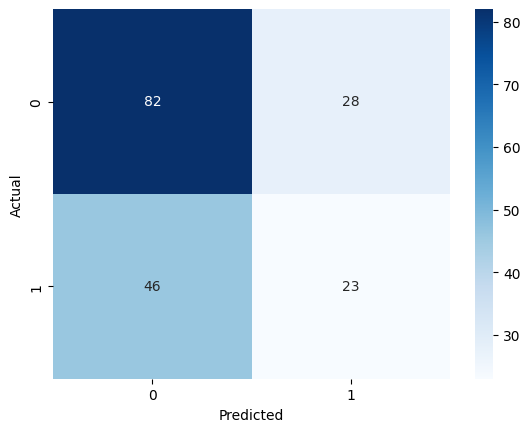

In [90]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  

### 4.5 Report Decision Tree Plot
Plot the decision tree model. We give the plotter the names of the features and the names of the categories for the target. Save the image so we can use it in other places.

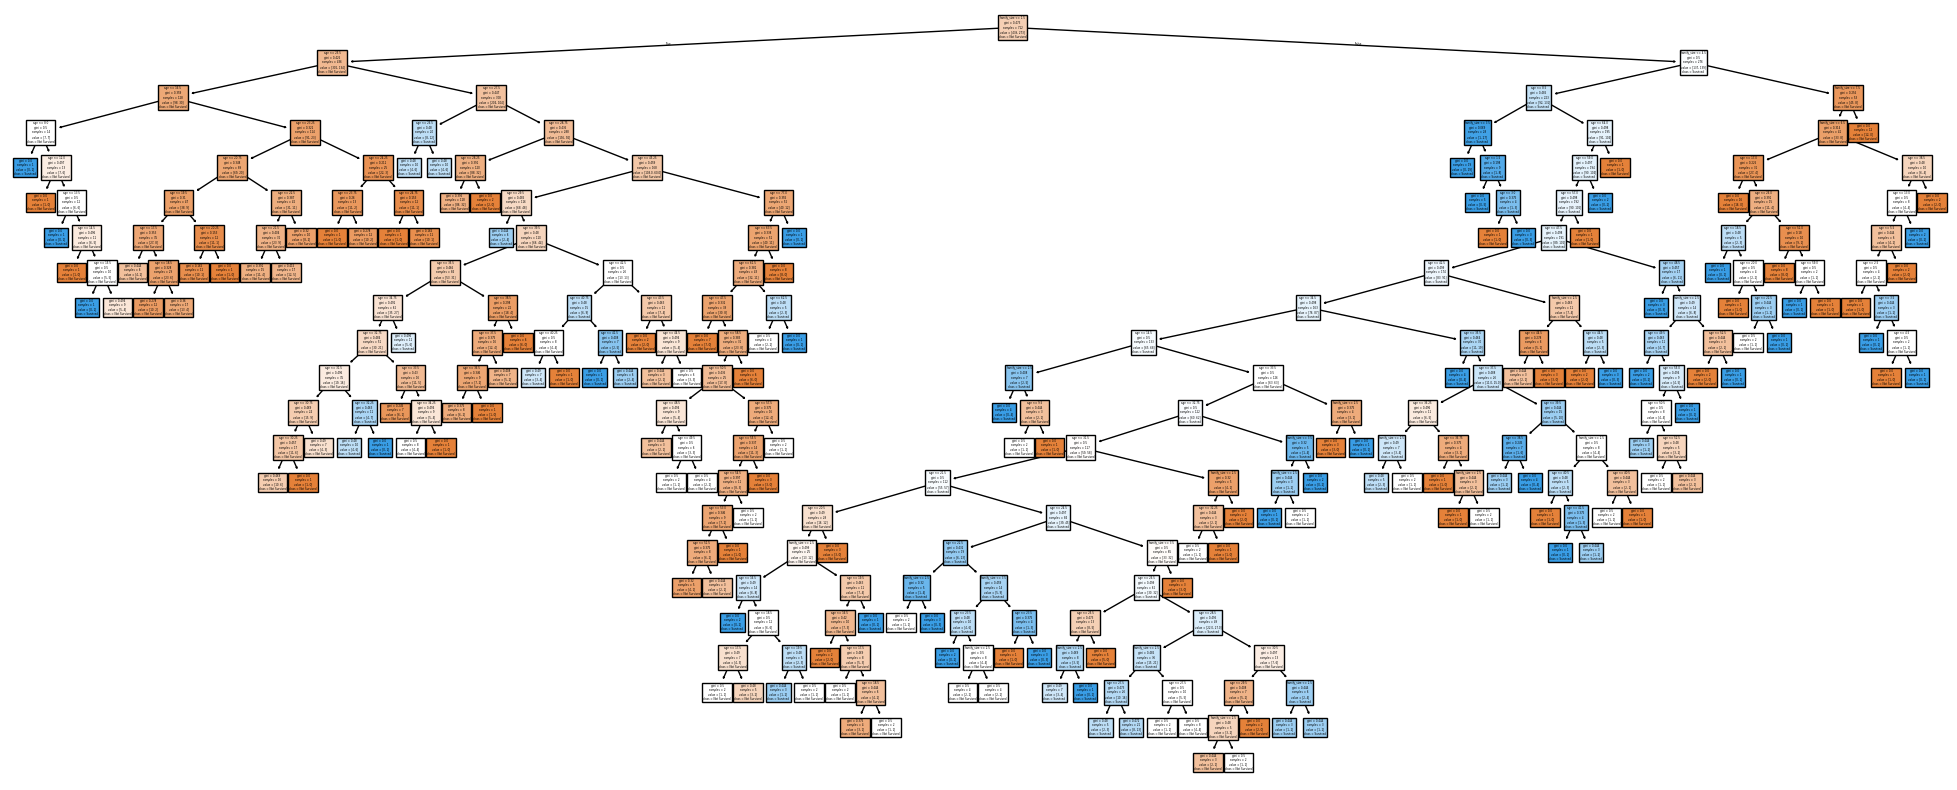

In [91]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic.png")

### Repeat for All 3 Cases
Try this for the 3 different cases: 1) using height as the only input  2) using weight as the only input and 3) using height and weight together as inputs. 

For each different case, redefine the input features in Section 3 (comment out the old case inputs X and target y and uncomment the new case inputs X and target y), then re-run Sections 4 and 5 for each case. Record your results in a Markdown table.



### Reflection of Section 4:

1) How well did the different cases perform?
2) Are there any surprising results?
3) Which inputs worked better? 


### Section 5. Compare Alternative Models (SVC, NN)
In a Support Vector Machine, the kernel function defines how the algorithm transforms data to find a hyperplane that separates the classes. If the data is not linearly separable, changing the kernel can help the model find a better decision boundary.

SVC Kernel: Common Types

RBF (Radial Basis Function) – Most commonly used; handles non-linear data well (default)
Linear – Best for linearly separable data (straight line separation)
Polynomial – Useful when the data follows a curved pattern
Sigmoid – Similar to a neural network activation function; less common
Commenting the options in and out in the code can be helpful. The analyst decides which to use based on their understanding of the results.

In [92]:
# RBF Kernel (default) - same as calling SVC()
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

# Linear Kernel
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# Polynomial Kernel (e.g., with degree=3)
svc_model = SVC(kernel='poly', degree=3)
svc_model.fit(X_train, y_train)

# Sigmoid Kernel
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)

NameError: name 'SVC' is not defined

SVC Kernel: How to Choose

Start with linear if you suspect the data is linearly separable.
Use RBF if the data is complex or you aren’t sure.
Try polynomial if the data seems to follow a curved boundary.
Use sigmoid for experiments (rarely the best choice).
SVC Kernel: Common Issues and Techniques

If the model takes too long to train, reduce the degree for polynomial kernels.
If support_vectors_ gives an error, the data may not be separable with the current kernel. Try switching to RBF or adjusting the C (regularization) value.
If the model misclassifies many points, then increase/decrease gamma or C.
Your process is valuable - record the work you do and the temporary results in your reflections and insights. To show your skills, show and tell us about your analysis process. Professional communication is key.

### 5.1 Train and Evaluate Model (SVC)
First, train an SVC model using the default kernel.

In [ ]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

Predict and evaluate the SVC model:

In [ ]:
y_pred_svc = svc_model.predict(X_test)

print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

### Visualize Support Vectors
Create a scatter plot to visualize the support vectors. This helps understand how the SVM model separates the data.
Step-by-Step Process:

1) Split the data into two groups:

Survived – Passengers who survived the Titanic sinking (value = 1).
Not Survived – Passengers who did not survive (value = 0).
2) Create a scatter plot of these two groups using different colors and markers:

Yellow squares ('s') for survived passengers
Cyan triangles ('^') for non-survived passengers
3) Overlay the support vectors on top of the plot:

Black pluses ('+') will represent the support vectors.
Since the support vectors are plotted last, they appear on top of the data points and are not obscured.

In [ ]:
import matplotlib.pyplot as plt

# Create data for charting - input target yes and input target no
survived_alone = X_test.loc[y_test == 1, 'alone']
not_survived_alone = X_test.loc[y_test == 0, 'alone']

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))
plt.scatter(survived_alone, y_test.loc[y_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_alone, y_test.loc[y_test == 0], c='cyan', marker='^', label='Not Survived')

# Add support vectors (if available)
if hasattr(svc_model, 'support_vectors_'):
    support_x = svc_model.support_vectors_[:, 0]  # First feature (alone)
    support_y = svc_model.support_vectors_[:, 1] if svc_model.support_vectors_.shape[1] > 1 else None
    
    # Plot support vectors
    if support_y is not None:
        plt.scatter(support_x, support_y, c='black', marker='+', label='Support Vectors')
    else:
        plt.scatter(support_x, [0] * len(support_x), c='black', marker='+', label='Support Vectors')

# Add labels and legend
plt.xlabel('Alone')
plt.ylabel('Survived')
plt.legend()
plt.title('Support Vectors (SVC)')
plt.show()

### 5.2 Train and Evaluate Model (NN MLP)
Now we'll use the NN (Multi Level Perceptron ) model. Again, we will give the neural net as much information as possible and understand that it could overfit on the extra data.

We have some hyper parameters that we can adjust. For the other models we just let them run with their defaults. Here we are going to use 3 hidden layers and change up the solver to one that is more likely to give good results for a small data set.

Train a neural network model:

In [ ]:
from sklearn.neural_network import MLPClassifier


nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')
nn_model.fit(X_train, y_train)

In [ ]:
#Predict and evaluate Neural Network model:

y_pred_nn = nn_model.predict(X_test)

print("Results for Neural Network on test data:")
print(classification_report(y_test, y_pred_nn))

In [ ]:
#Plot confusion matrix:

cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Reflection 5:
How well did each model perform?
Are there any surprising results?
Why might one model outperform the others?

### Section 6. Final Thoughts & Insights
#### 6.1 Summarize Findings

1) What indicators are strong predictors of gender?
2) Decision Tree performed well but overfit slightly on training data.
3) Neural Network showed moderate improvement but introduced complexity.

#### 6.2 Discuss Challenges Faced
1) Small sample size could limit generalizability.
2) Missing values (if any) could bias the model.

#### 6.3 Next Steps
1) Test more features (e.g., BMI class).
2) Try hyperparameter tuning for better results.